<a href="https://colab.research.google.com/github/Saria-Alashry/Alashry/blob/%D8%A7%D9%84%D9%83%D9%88%D8%B1%D8%B3-%D8%A7%D9%84%D9%85%D9%81%D8%B5%D9%84-%D9%81%D9%8A-%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D9%88%D9%85%D8%B3%D8%A7%D8%A8%D9%82%D8%A9-%D8%A8%D8%B1%D9%85%D8%AC%D8%A9-50-%D8%A7%D9%84%D9%81-%D8%AC%D9%86%D9%8A%D9%87/Week3_Regression_on_real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Linear & Polynomial Regression on Real Data

**Instructor:** Dr. Mahmoud Eid (m.eid@fci-cu.edu.eg)

<div dir="rtl" style="text-align: right; font-size: 0.9em; color: #888; margin: 10px 0;">
Week 3:
 الـ Linear و Polynomial Regression على data حقيقية </div>

Welcome to Week 3! 🎯 This we're working with an **actual real-world dataset** for the first time! .. Everything you learned in Weeks 1 and 2 will now be applied to this regression problems containing data for 20,000+ real houses.

## What You Learned in Previous Weeks

Revise those before the current week if needed.

**Week 1 (Python Fundamentals - Lectures 1-2):**
- Variables and data types
- Lists and indexing → Now we'll use NumPy arrays!
- **Loops** → We'll use them for training iterations (epochs)
- **Functions** → We'll create prediction and cost functions

**Week 2 (NumPy & Visualization - Lectures 3-4):**
- **NumPy arrays** → Perfect for storing features and predictions!
- **Vectorization** → Makes our gradient descent FAST!
- **Broadcasting** → Simplifies weight updates
- **Matplotlib** → We'll visualize regressions, loss curves, and more!
- **Statistical operations** (mean, std, correlation)

## Today's Journey (Lectures 3-4 Material)

**Lecture 3:** Linear & Polynomial Regression  
**Lecture 4:** Gradient Descent & Optimizers

<div dir="rtl" style="text-align: right; font-size: 0.9em; color: #aaa; margin: 10px 0;">في Lectures 3 و 4 اتعلمت النظري - النهاردة هنطبقها على data حقيقية بإذن الله!</div>

**Today's goal:** See these concepts working on REAL data - not synthetic examples!

## What We'll Build

1. **Load real housing data** (California Housing dataset - 20,640 actual houses!)
2. **Explore correlations** between features and prices
3. **Build linear regression from scratch** using gradient descent (Lecture 3)
4. **Try polynomial regression** and see overfitting
5. **Compare optimizers** (Batch GD, SGD, Mini-batch, Momentum, RMSprop, Adam) from Lecture 4
6. **Use sklearn and Pytorch** to see how professionals do it
7. **Practice** with different features

**Estimated Time:** 3 to 4 hours


Let's begin! 🚀

---

## Part 1: Loading Real Data

In Weeks 1 and 2, we worked with small synthetic datasets. Today, we'll use the **California Housing Dataset** - a real dataset with actual housing prices!

**What's in this dataset?**
- **20,640 houses** in California
- **8 features** like income, house age, number of rooms
- **Target:** Median house price

This is what data scientists work with every day!

In [1]:
# Import libraries (remember these from Weeks 1 and 2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # the data is inside the library so we can easily import it and then call it later to get the data
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# PyTorch for optimizers comparison .. PyTorch is one of the most important frameworks that we will use
import torch
import torch.nn as nn
import torch.optim as optim

plt.style.use('dark_background') # Dark theme

# For reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("All libraries loaded successfully!")
print(f"NumPy version: {np.__version__}")
print(f"PyTorch version: {torch.__version__}")

All libraries loaded successfully!
NumPy version: 2.0.2
PyTorch version: 2.9.0+cpu


In [2]:
# Load the California Housing dataset
california = fetch_california_housing()

# Extract features (X) and target (y)
X = california.data
y = california.target

# Get feature names
feature_names = california.feature_names

print("Dataset loaded successfully!")
print(f"\nNumber of samples: {X.shape[0]:,}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature descriptions:")
print(f"  0: MedInc      - Median income in block group (in $10,000s)")
print(f"  1: HouseAge    - Median house age in block group (in years)")
print(f"  2: AveRooms    - Average number of rooms per household")
print(f"  3: AveBedrms   - Average number of bedrooms per household")
print(f"  4: Population  - Block group population")
print(f"  5: AveOccup    - Average number of household members")
print(f"  6: Latitude    - Block group latitude")
print(f"  7: Longitude   - Block group longitude")
print(f"\nTarget: Median house value (in $100,000s)")
print(f"\nExample: MedInc=3.5 means median income is $35,000")

Dataset loaded successfully!

Number of samples: 20,640
Number of features: 8

Feature descriptions:
  0: MedInc      - Median income in block group (in $10,000s)
  1: HouseAge    - Median house age in block group (in years)
  2: AveRooms    - Average number of rooms per household
  3: AveBedrms   - Average number of bedrooms per household
  4: Population  - Block group population
  5: AveOccup    - Average number of household members
  6: Latitude    - Block group latitude
  7: Longitude   - Block group longitude

Target: Median house value (in $100,000s)

Example: MedInc=3.5 means median income is $35,000


In [3]:
# Let's look at the first 5 samples
print("First 5 houses:\n")
for i in range(5):
    print(f"House {i+1}:")
    for j, name in enumerate(feature_names):
        print(f"  {name}: {X[i, j]:.2f}")
    print(f"  → Price: ${y[i]*100000:,.0f}")
    print()

First 5 houses:

House 1:
  MedInc: 8.33
  HouseAge: 41.00
  AveRooms: 6.98
  AveBedrms: 1.02
  Population: 322.00
  AveOccup: 2.56
  Latitude: 37.88
  Longitude: -122.23
  → Price: $452,600

House 2:
  MedInc: 8.30
  HouseAge: 21.00
  AveRooms: 6.24
  AveBedrms: 0.97
  Population: 2401.00
  AveOccup: 2.11
  Latitude: 37.86
  Longitude: -122.22
  → Price: $358,500

House 3:
  MedInc: 7.26
  HouseAge: 52.00
  AveRooms: 8.29
  AveBedrms: 1.07
  Population: 496.00
  AveOccup: 2.80
  Latitude: 37.85
  Longitude: -122.24
  → Price: $352,100

House 4:
  MedInc: 5.64
  HouseAge: 52.00
  AveRooms: 5.82
  AveBedrms: 1.07
  Population: 558.00
  AveOccup: 2.55
  Latitude: 37.85
  Longitude: -122.25
  → Price: $341,300

House 5:
  MedInc: 3.85
  HouseAge: 52.00
  AveRooms: 6.28
  AveBedrms: 1.08
  Population: 565.00
  AveOccup: 2.18
  Latitude: 37.85
  Longitude: -122.25
  → Price: $342,200



In [4]:
# Basic statistics (using Week 2 knowledge!)
print("Feature Statistics:\n")
print(f"{'Feature':<15} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}") # < is just for spacing so don't worry about this .. this is just for visualising this to look like a table
print("="*63)
for i, name in enumerate(feature_names):
    print(f"{name:<15} {np.mean(X[:, i]):<12.2f} {np.std(X[:, i]):<12.2f} "
          f"{np.min(X[:, i]):<12.2f} {np.max(X[:, i]):<12.2f}")

print(f"\n{'Target (Price)':<15} {np.mean(y):<12.2f} {np.std(y):<12.2f} "
      f"{np.min(y):<12.2f} {np.max(y):<12.2f}")

Feature Statistics:

Feature         Mean         Std          Min          Max         
MedInc          3.87         1.90         0.50         15.00       
HouseAge        28.64        12.59        1.00         52.00       
AveRooms        5.43         2.47         0.85         141.91      
AveBedrms       1.10         0.47         0.33         34.07       
Population      1425.48      1132.43      3.00         35682.00    
AveOccup        3.07         10.39        0.69         1243.33     
Latitude        35.63        2.14         32.54        41.95       
Longitude       -119.57      2.00         -124.35      -114.31     

Target (Price)  2.07         1.15         0.15         5.00        


**Key Observations:**
- We have over 20,000 real houses!
- Features have different scales (MedInc: 0-15, Population: 3-35,682)
- In Lecture 7, you'll learn about **normalization** to handle this
- For now, we'll work with features that have similar scales

---

## Exploratory Data Analysis (EDA)

## Part 2: Correlation Analysis

Before building a model, let's explore the data visually! This is a critical step in any ML project.

**Question:** Which features are most correlated with house prices?

Recall from the first lecture that **Correlation** measures how two variables move/change together:
- **+1:** Perfect positive correlation (both increase together)
- **0:** No correlation
- **-1:** Perfect negative correlation (one increases, other decreases)

You learned about correlation in **Week 1** - now let's use it!

In [5]:
# Calculate correlation of each feature with target
correlations = []
for i in range(X.shape[1]):
    # Correlation formula: cov(X, y) / (std(X) * std(y))  ... remember that correlation is just normalised covariance
    corr = np.corrcoef(X[:, i], y)[0, 1] # we can call this function to get the correlation directly
    correlations.append(corr)

# Sort by absolute correlation
sorted_indices = np.argsort(np.abs(correlations))[::-1] # because for predicting the price we don't really care if the correlation
# is positive or negative but about the strength of the correlation, remember in the simulation of the first lecture
# when points where close to the regression line and in the positive direction this increased the correlation coefficient value
# so this is what we want here.

print("Features ranked by correlation with Price:\n")
print(f"{'Rank':<6} {'Feature':<15} {'Correlation':<12}")
print("="*35)
for rank, idx in enumerate(sorted_indices, 1):
    print(f"{rank:<6} {feature_names[idx]:<15} {correlations[idx]:>+11.3f}")

print(f"\nKey Insight: {feature_names[sorted_indices[0]]} has the strongest correlation!")

Features ranked by correlation with Price:

Rank   Feature         Correlation 
1      MedInc               +0.688
2      AveRooms             +0.152
3      Latitude             -0.144
4      HouseAge             +0.106
5      AveBedrms            -0.047
6      Longitude            -0.046
7      Population           -0.025
8      AveOccup             -0.024

Key Insight: MedInc has the strongest correlation!


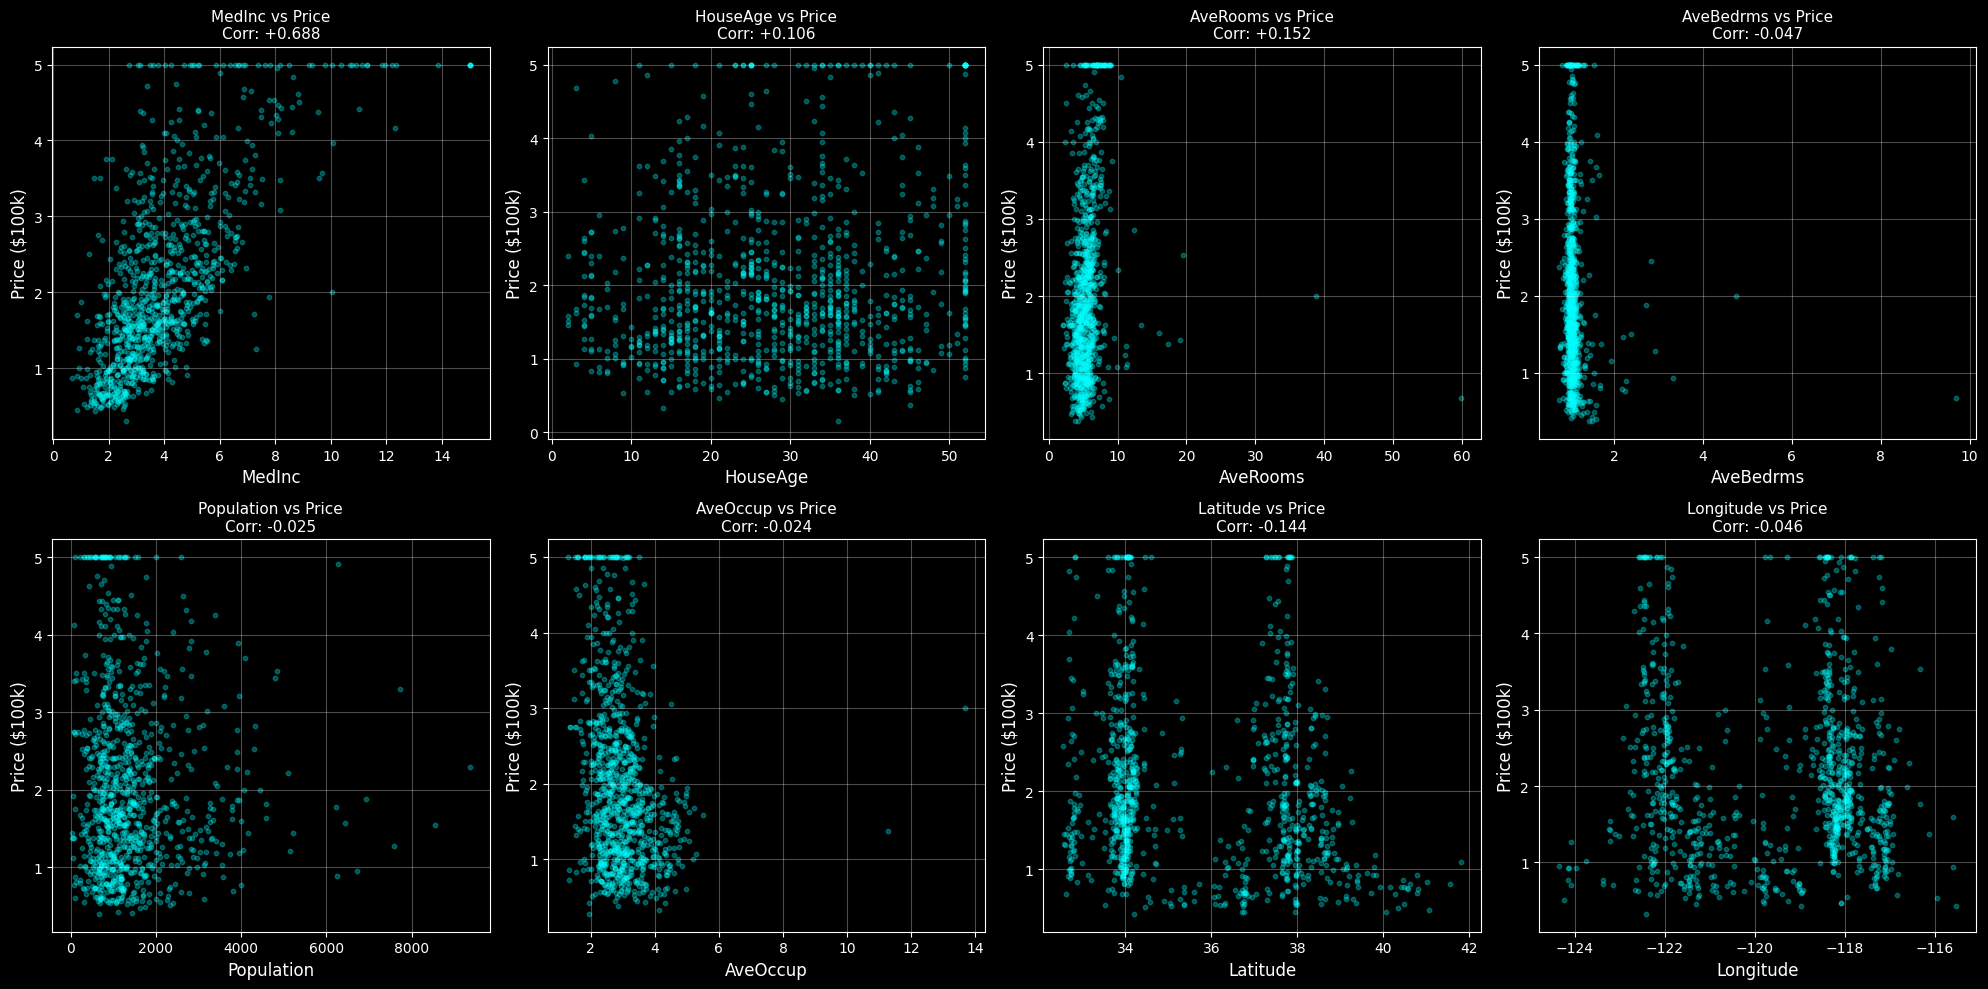

Notice how MedInc (median income) shows the clearest positive correlation .. also notice how things are looking different when dealing with real data!


In [6]:
# Visualize all features vs target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (ax, name) in enumerate(zip(axes, feature_names)):
    # Sample 1000 points for cleaner visualization
    indices = np.random.choice(X.shape[0], 1000, replace=False)

    ax.scatter(X[indices, i], y[indices], alpha=0.3, s=10, c='cyan')
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('Price ($100k)', fontsize=12)
    ax.set_title(f'{name} vs Price\nCorr: {correlations[i]:+.3f}', fontsize=11)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice how MedInc (median income) shows the clearest positive correlation .. also notice how things are looking different when dealing with real data!")

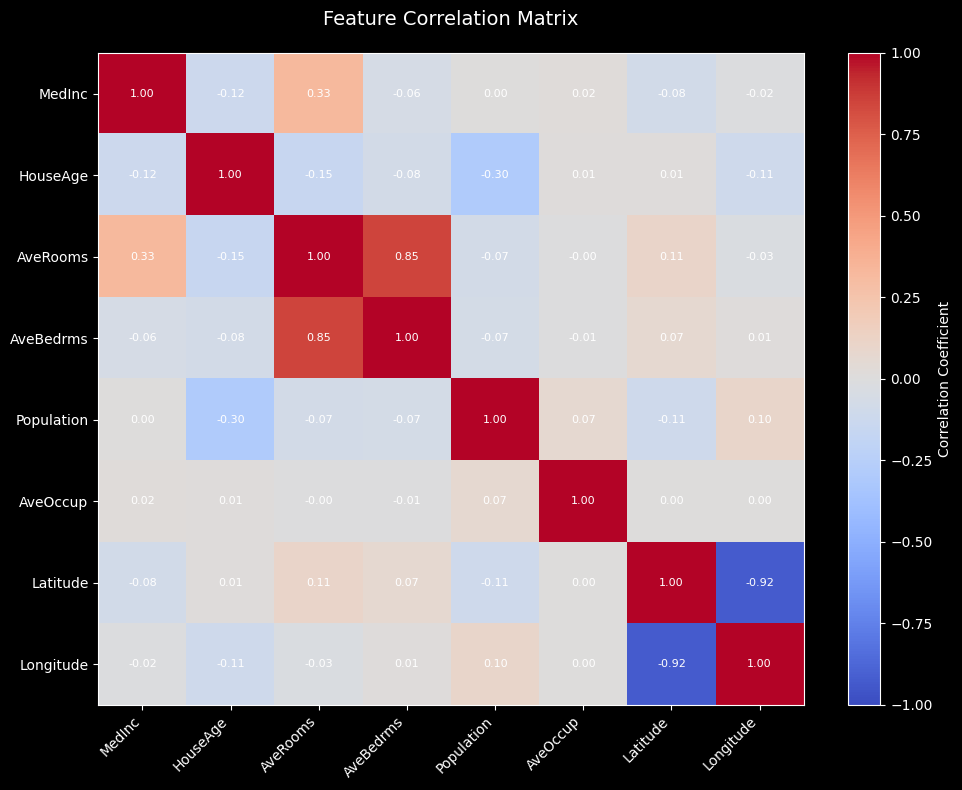


This helps us understand multicollinearity (covered in Lecture 7 but we briefly mentioned it in the first lecture 
 see how AveBedrms and AveRooms are correlated)


In [7]:
# Correlation matrix heatmap
# Calculate correlation between all features
correlation_matrix = np.corrcoef(X.T)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
plt.yticks(range(len(feature_names)), feature_names)
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)

# Add correlation values
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\nThis helps us understand multicollinearity (covered in Lecture 7 but we briefly mentioned it in the first lecture \n see how AveBedrms and AveRooms are correlated)")

**Key Insights:**
1. **MedInc** (median income) has the strongest correlation with price (+0.688)
2. **AveRooms** and **AveBedrms** are highly correlated (0.85) - makes sense!
3. Features with stronger correlations will give better predictions
4. This is where **feature selection** might be useful as well (Lecture 10)

---

## Part 3: Linear Regression from Scratch

Now let's build **linear regression** exactly like you saw in **Lecture 3**!

We'll use **MedInc** (median income) as our feature since it has the strongest correlation.

**Remember from Lecture 3:**
- Model: `ŷ = w * x + b`
- Cost function (MSE): `J = (1/2m) * Σ(ŷ - y)²`
- Gradient descent updates:
  - `w = w - η * (1/m) * Σ(ŷ - y) * x`
  - `b = b - η * (1/m) * Σ(ŷ - y)`

This is **NOT OOP-based** - just simple, clear code using **loops** (Week 1) and **vectorization** (Week 2) .. so that we see the functionality in a simpler way!

In [8]:
# Extract MedInc feature (feature 0)
x_medinc = X[:, 0]  # Median income
y_price = y          # House price

print(f"Training samples: {len(x_medinc):,}")
print(f"Feature: {feature_names[0]}")
print(f"Target: Median house value")

Training samples: 20,640
Feature: MedInc
Target: Median house value


In [9]:
# Initialize parameters (like the code we discussed in Lecture 4)
np.random.seed(42)
w = np.random.rand()  # Random weight
b = np.random.rand()  # Random bias

# Hyperparameters
learning_rate = 0.01  # Learning rate .. Eta (η)
epochs = 1000         # Number of training iterations
n = len(x_medinc)     # Number of samples

# Store cost history
cost_history = []

print(f"Initial w: {w:.4f}")
print(f"Initial b: {b:.4f}")
print(f"Learning rate: {learning_rate}")
print(f"Epochs: {epochs}")
print(f"\nStarting training...")

Initial w: 0.3745
Initial b: 0.9507
Learning rate: 0.01
Epochs: 1000

Starting training...


In [10]:
# Gradient Descent Training Loop (from the code we discussed in Lecture 4)
for epoch in range(epochs):
    # Forward pass: Make predictions (note the name forward pass when we are applying the weights)
    y_pred = (w * x_medinc) + b

    # Calculate error
    error = y_pred - y_price

    # Calculate gradients (using vectorization from Week 2!)
    grad_w = np.mean(error * x_medinc)  # Gradient for weight .. note here we took the mean and in the lecture when we did dot product
    # so multiplication and addition we only followed that with division by the number of samples .. so they are similar
    grad_b = np.mean(error)             # Gradient for bias

    # Update parameters (gradient descent step)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

    # Calculate cost (MSE)
    cost = 0.5 * np.mean(error**2)
    cost_history.append(cost)

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:4d}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

print(f"\nTraining complete!")
print(f"Final w: {w:.4f}")
print(f"Final b: {b:.4f}")
print(f"Final cost (MSE): {cost_history[-1]:.4f}")

Epoch    1: Cost = 0.4090, w = 0.3633, b = 0.9474
Epoch  100: Cost = 0.3665, w = 0.3328, b = 0.8555
Epoch  200: Cost = 0.3616, w = 0.3473, b = 0.7868
Epoch  300: Cost = 0.3581, w = 0.3593, b = 0.7297
Epoch  400: Cost = 0.3558, w = 0.3693, b = 0.6823
Epoch  500: Cost = 0.3542, w = 0.3775, b = 0.6430
Epoch  600: Cost = 0.3530, w = 0.3844, b = 0.6104
Epoch  700: Cost = 0.3523, w = 0.3901, b = 0.5833
Epoch  800: Cost = 0.3517, w = 0.3948, b = 0.5608
Epoch  900: Cost = 0.3514, w = 0.3987, b = 0.5421
Epoch 1000: Cost = 0.3511, w = 0.4020, b = 0.5266

Training complete!
Final w: 0.4020
Final b: 0.5266
Final cost (MSE): 0.3511


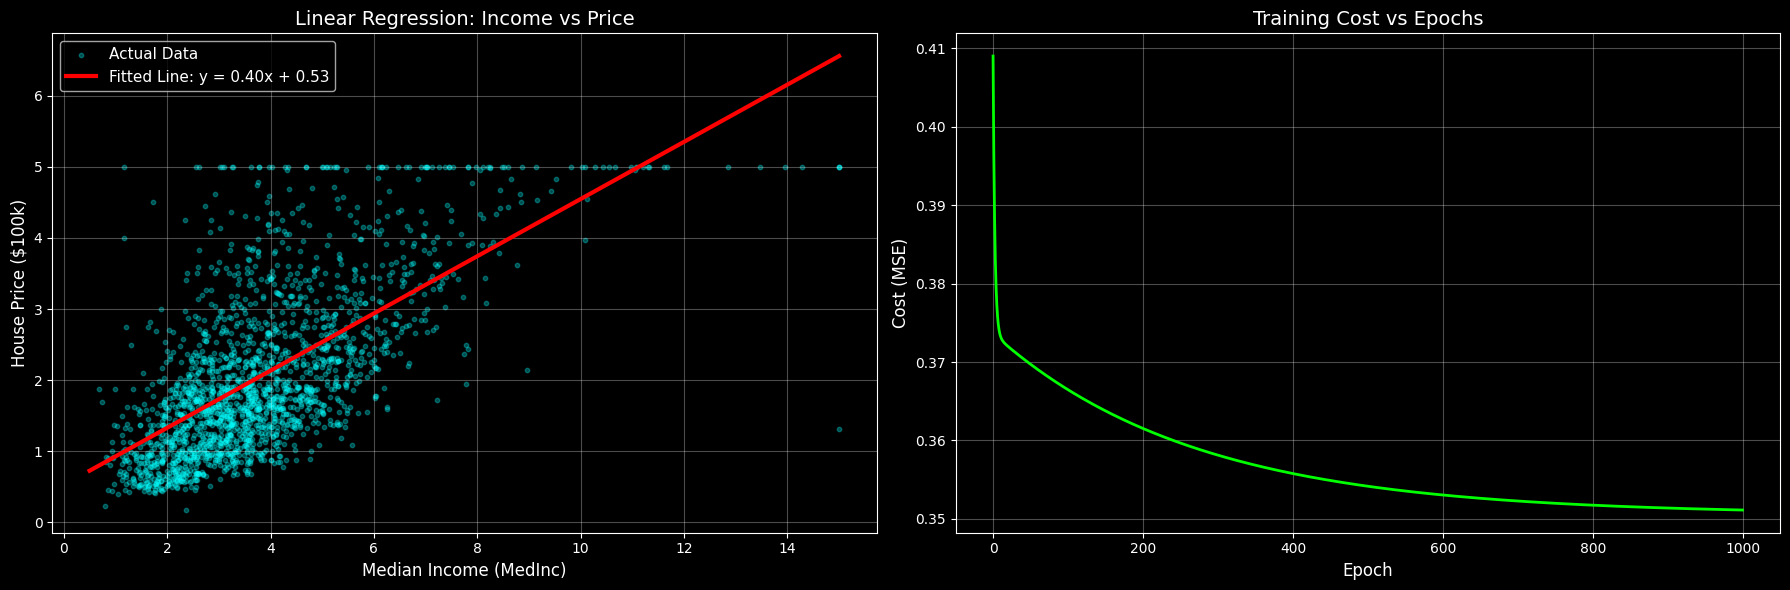


Notice how the cost decreases smoothly - this is gradient descent working!
The red line shows our model's predictions.


In [11]:
# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Data and fitted line
ax1 = axes[0]
# Sample points for clearer visualization
indices = np.random.choice(n, 2000, replace=False)
ax1.scatter(x_medinc[indices], y_price[indices], alpha=0.3, s=10,
           c='cyan', label='Actual Data')

# Plot fitted line
x_line = np.linspace(x_medinc.min(), x_medinc.max(), 100)
y_line = w * x_line + b
ax1.plot(x_line, y_line, 'r-', linewidth=3, label=f'Fitted Line: y = {w:.2f}x + {b:.2f}')

ax1.set_xlabel('Median Income (MedInc)', fontsize=12)
ax1.set_ylabel('House Price ($100k)', fontsize=12)
ax1.set_title('Linear Regression: Income vs Price', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Cost convergence
ax2 = axes[1]
ax2.plot(cost_history, 'lime', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Cost (MSE)', fontsize=12)
ax2.set_title('Training Cost vs Epochs', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNotice how the cost decreases smoothly - this is gradient descent working!")
print("The red line shows our model's predictions.")

In [12]:
# Make predictions on new data
test_incomes = np.array([2.0, 4.0, 6.0, 8.0])
test_predictions = w * test_incomes + b

print("Predictions on new data:\n")
for income, pred in zip(test_incomes, test_predictions):
    print(f"Median Income = {income:.1f} → Predicted Price = ${pred*100000:,.0f}")

print(f"\nInterpretation: For every $10,000 increase in median income, ")
print(f"house price increases by ${w*10000:,.0f} on average.")
# note how when we wanted to mention rate of change we didn't include the bias so we cared about the slope itself

Predictions on new data:

Median Income = 2.0 → Predicted Price = $133,063
Median Income = 4.0 → Predicted Price = $213,464
Median Income = 6.0 → Predicted Price = $293,865
Median Income = 8.0 → Predicted Price = $374,267

Interpretation: For every $10,000 increase in median income, 
house price increases by $4,020 on average.


**What Just Happened?**

1. We initialized random `w` and `b` (weights and bias)
2. Used a **loop** (Week 1) to iterate through 1000 epochs
3. Used **vectorization** (Week 2) for fast gradient calculations
4. Updated weights using gradient descent (Lecture 3 formula)
5. Cost decreased - our model learned!

This is what happens inside important Machine and Deep learning libraries like TensorFlow and PyTorch!

---

## Part 4: Polynomial Regression

In **Lecture 3**, you learned about **polynomial regression** - fitting curves instead of straight lines.

**Linear:** `ŷ = w₁x + b`  
**Quadratic:** `ŷ = w₂x² + w₁x + b`  
**Cubic:** `ŷ = w₃x³ + w₂x² + w₁x + b`

Let's see if a polynomial fits better than a line!

In [13]:
# Create polynomial features manually (like Lecture 3)
def create_polynomial_features(x, degree):
    """
    Create polynomial features up to specified degree.

    Example: x = [1, 2], degree = 2
    """
    n = len(x)
    X_poly = np.zeros((n, degree + 1))

    for i in range(degree + 1):
        X_poly[:, i] = x ** i

    return X_poly

# Test the function
test_x = np.array([1, 2, 3]) # this is the column of x
test_poly = create_polynomial_features(test_x, degree=2)
# the first column represents bias so always 1 and the second column is x [1 2 3] then x squared etc.
# note how the bias can be added as a feature with values of 1 because when we multiply that weight with that feature (ones) that would
# give just the bias so we now work with weights directly
print("Example: x = [1, 2, 3], degree = 2")
print("Polynomial features:")
print(test_poly)
print("\nColumns: [1, x, x²]")

Example: x = [1, 2, 3], degree = 2
Polynomial features:
[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]

Columns: [1, x, x²]


In [14]:
# Train polynomial regression using sklearn (NOT from scratch! now we see how to call models from libraries)
def train_polynomial_regression_sklearn(x, y, degree, epochs=500):
    """
    Train polynomial regression using sklearn's PolynomialFeatures + LinearRegression.
    We track cost history for visualization purposes.
    """
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression

    # Create polynomial features using sklearn
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(x.reshape(-1, 1)) # x.reshape(-1, 1) putting data in samples and one feature ..
    # fit_transform does both the training (fit) and then applies that to data (transform) .. this function is similar to our
    # function in the previous cell: create_polynomial_features .. so it gives the polynomial features

    # Train using sklearn's LinearRegression
    model = LinearRegression(fit_intercept=False)  # bias already in poly features so we added the ones for the bias
    # so we need that to be false otherwise it would add it again here
    model.fit(X_poly, y)

    # Get predictions and calculate MSE
    y_pred = model.predict(X_poly)
    mse = 0.5 * np.mean((y_pred - y)**2)

    # Create cost history (same value repeated for compatibility with plotting)
    costs = [mse] * epochs

    return model.coef_, costs, X_poly

print("Polynomial regression function ready (using sklearn)!")

Polynomial regression function ready (using sklearn)!


In [15]:
# Train models with different polynomial degrees using sklearn
degrees = [1, 2, 3, 5]
models = {}

print("Training polynomial models with sklearn...\n")
for degree in degrees:
    weights, costs, _ = train_polynomial_regression_sklearn(x_medinc, y_price,
                                                            degree=degree,
                                                            epochs=500)
    models[degree] = (weights, costs)
    print(f"Degree {degree}: Final MSE = {costs[-1]:.4f}")

print("\nAll models trained using sklearn!")

Training polynomial models with sklearn...

Degree 1: Final MSE = 0.3506
Degree 2: Final MSE = 0.3475
Degree 3: Final MSE = 0.3421
Degree 5: Final MSE = 0.3420

All models trained using sklearn!


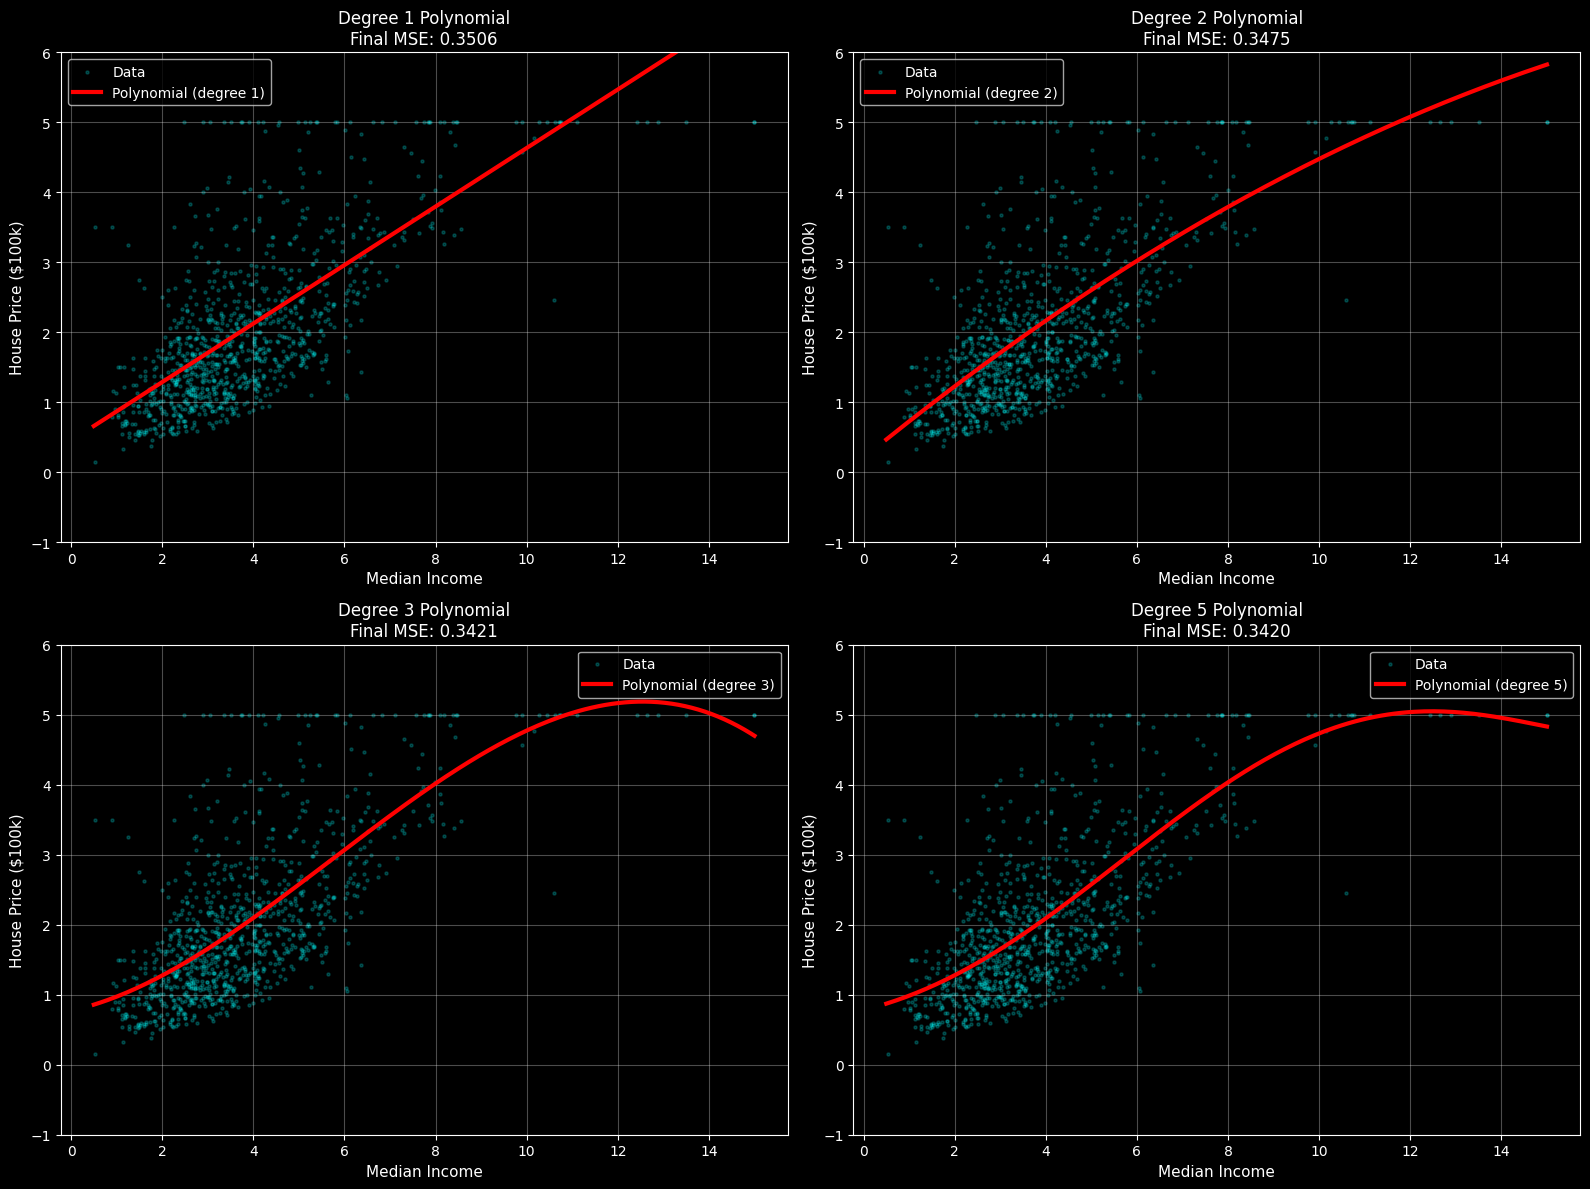

Notice: Higher degrees fit the data better BUT become wiggly at the edges!
This could be the beginning of OVERFITTING


In [16]:
# Visualize polynomial fits
from sklearn.preprocessing import PolynomialFeatures

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Sample data for plotting
indices = np.random.choice(len(x_medinc), 1000, replace=False)
x_plot = np.linspace(x_medinc.min(), x_medinc.max(), 200)

for ax, degree in zip(axes, degrees):
    # Plot data
    ax.scatter(x_medinc[indices], y_price[indices],
              alpha=0.2, s=5, c='cyan', label='Data')

    # Plot polynomial fit using sklearn
    weights = models[degree][0]
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_plot_poly = poly.fit_transform(x_plot.reshape(-1, 1))
    y_plot = X_plot_poly @ weights

    ax.plot(x_plot, y_plot, 'r-', linewidth=3,
           label=f'Polynomial (degree {degree})')

    ax.set_xlabel('Median Income', fontsize=11)
    ax.set_ylabel('House Price ($100k)', fontsize=11)
    ax.set_title(f'Degree {degree} Polynomial\nFinal MSE: {models[degree][1][-1]:.4f}',
                fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-1, 6])

plt.tight_layout()
plt.show()

print("Notice: Higher degrees fit the data better BUT become wiggly at the edges!")
print("This could be the beginning of OVERFITTING")

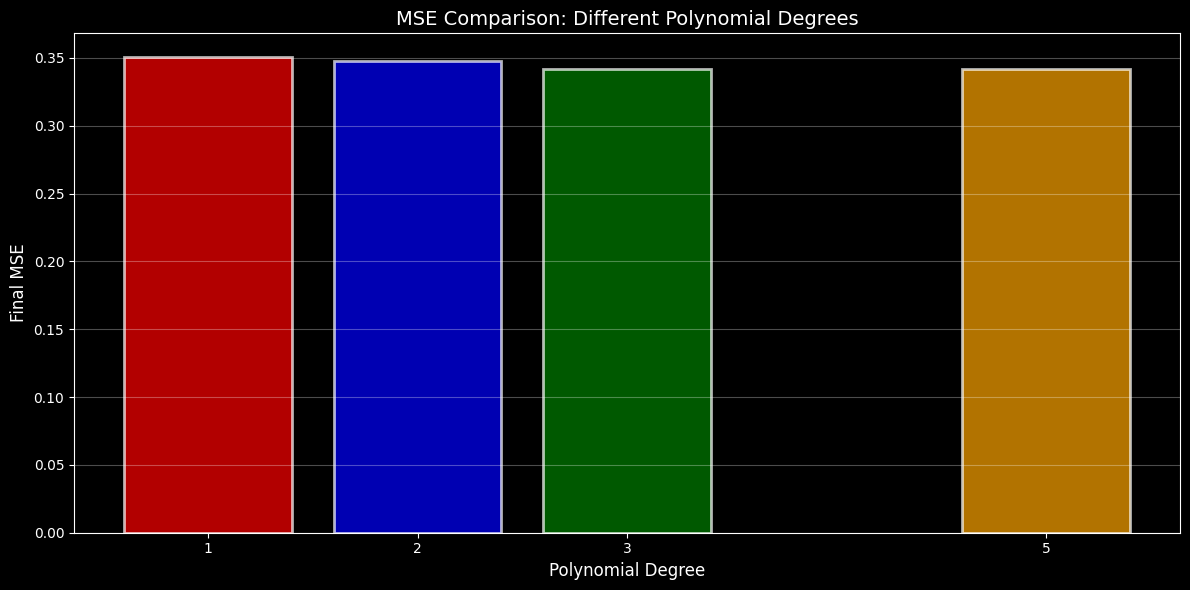

Higher degree polynomials achieve lower training error.
But this doesn't always mean better generalization on new samples!

MSE values:
  Degree 1: 0.3506
  Degree 2: 0.3475
  Degree 3: 0.3421
  Degree 5: 0.3420


In [17]:
# Compare final MSE values (not convergence, since sklearn solves instantly)
degrees_list = list(degrees)
mse_values = [models[degree][1][-1] for degree in degrees]

plt.figure(figsize=(12, 6))

# Bar plot showing MSE for each degree
plt.bar(degrees_list, mse_values, color=['red', 'blue', 'green', 'orange'], alpha=0.7, edgecolor='white', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Final MSE', fontsize=12)
plt.title('MSE Comparison: Different Polynomial Degrees', fontsize=14)
plt.xticks(degrees_list)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Higher degree polynomials achieve lower training error.")
print("But this doesn't always mean better generalization on new samples!")
print(f"\nMSE values:")
for degree in degrees:
    print(f"  Degree {degree}: {models[degree][1][-1]:.4f}")

**Key Insights:**

1. **Degree 1** (linear) is simple but has higher error
2. **Degree 2-3** provide a good balance
3. **Degree 5** has lowest training error BUT notice the wiggles!
4. This demonstrates the **bias-variance tradeoff** a little bit (more on that in Lecture 8)

**When to use polynomial regression?**
- When relationship is clearly non-linear
- Be careful not to overfit with high degrees
- You'll learn proper validation and testing in Lecture 7!

---

## Part 5: Comparing Optimizers


**Types of Gradient Descent:**
1. **Batch GD** - Uses ALL data at once (what we did above)
2. **Stochastic GD (SGD)** - Uses ONE sample at a time
3. **Mini-batch GD** - Uses small batches of samples

**Advanced Optimizers (Lecture 4):**

4. **Momentum**
5. **RMSprop**
6. **Adam**


In [18]:
# Prepare data (use first 5000 samples for faster training)
n_samples = 5000
X_train = X[:n_samples, 0].reshape(-1, 1)  # MedInc only
y_train = y[:n_samples]

print(f"Training with {n_samples} samples")
print(f"Feature: {feature_names[0]}")
print(f"\nWe'll compare 6 different optimizers!")

Training with 5000 samples
Feature: MedInc

We'll compare 6 different optimizers!


In [19]:
# 1. Batch Gradient Descent (from scratch)
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=200):
    """
    Standard batch gradient descent.
    Uses ALL samples in each iteration.
    """
    n = len(X)
    np.random.seed(42)
    w = 0.5
    b = 0.5

    costs = []
    w_hist = [w]
    b_hist = [b]

    for epoch in range(epochs):
        # Predictions
        y_pred = w * X.flatten() + b # X.flatten() converts x to 1d .. note how we change the implementation slightly so that you familirise yourself with different functions
        # different ways of implementing the same thing
        error = y_pred - y

        # Gradients (using ALL samples)
        grad_w = np.mean(error * X.flatten())
        grad_b = np.mean(error)

        # Update
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        # Cost
        cost = 0.5 * np.mean(error**2)
        costs.append(cost)
        w_hist.append(w)
        b_hist.append(b)

    # Return full history for visualization
    return costs, np.array(w_hist), np.array(b_hist)

print("Batch Gradient Descent function ready!")


Batch Gradient Descent function ready!


In [20]:
# Train all optimizers using PyTorch .. note how we do that with PyTorch and how we put our data in specific format for PyTorch
# it may seem a lot for now but when the models are complicated PyTorch is the go to.
# don't worry if you don't know all the steps right now because we will come to them many times with other models
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train)
y_train_torch = torch.FloatTensor(y_train)

max_iter = 200
results = {}

print("Training optimizers with PyTorch...\n")

# Function to create and initialize model with same weights
def create_model():
    torch.manual_seed(42)  # Fix seed for reproducible initialization
    model = nn.Linear(1, 1) # Create a simple linear model: y = w * x + b
    # Initialize with same values for fair comparison
    nn.init.constant_(model.weight, 0.5)
    nn.init.constant_(model.bias, 0.5)
    return model

# Modified loss function to match our from-scratch (0.5 * MSE)
def custom_mse_loss(output, target):
    return 0.5 * torch.mean((output - target) ** 2)

# 1. Batch Gradient Descent (from scratch - reference)
print("1. Batch Gradient Descent (from scratch)...")
costs_batch, w_batch, b_batch = batch_gradient_descent(X_train, y_train,
                                                        learning_rate=0.01,
                                                        epochs=max_iter)
w_batch_3d = w_batch  # assign AFTER the function call
b_batch_3d = b_batch
results['Batch GD'] = costs_batch
print(f"   Final MSE: {costs_batch[-1]:.4f}")

# 2. SGD (Stochastic Gradient Descent)
print("\n2. Stochastic Gradient Descent (SGD)...")
model_sgd = create_model()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01) # Use PyTorch's built-in SGD optimizer
costs_sgd = []
w_history_sgd = [0.5]
b_history_sgd = [0.5]

for epoch in range(max_iter):
    # not how we have the main structure of applying the weights then computing gradients then updating the weights
    # but now we are doing this with PyTorch so we are not manually calculating them
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train_torch) # Forward pass: predict prices from input feature
    loss = custom_mse_loss(outputs.squeeze(), y_train_torch) # Compute loss (0.5 * MSE)
    loss.backward() # Backpropagation: compute gradients
    optimizer_sgd.step() # Update parameters using gradients
    # Store loss and parameters for analysis
    costs_sgd.append(loss.item())
    w_history_sgd.append(model_sgd.weight.item())
    b_history_sgd.append(model_sgd.bias.item())

results['SGD'] = costs_sgd
print(f"   Final MSE: {costs_sgd[-1]:.4f}")

# 3. SGD with Momentum
print("\n3. SGD with Momentum...")
model_momentum = create_model()
optimizer_momentum = optim.SGD(model_momentum.parameters(), lr=0.01, momentum=0.9)
costs_momentum = []
w_history_momentum = [0.5]
b_history_momentum = [0.5]

for epoch in range(max_iter):
    optimizer_momentum.zero_grad()
    outputs = model_momentum(X_train_torch)
    loss = custom_mse_loss(outputs.squeeze(), y_train_torch)
    loss.backward()
    optimizer_momentum.step()
    costs_momentum.append(loss.item())
    w_history_momentum.append(model_momentum.weight.item())
    b_history_momentum.append(model_momentum.bias.item())

results['Momentum'] = costs_momentum
print(f"   Final MSE: {costs_momentum[-1]:.4f}")

# 4. RMSprop
print("\n4. RMSprop...")
model_rmsprop = create_model()
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.01)
costs_rmsprop = []
w_history_rmsprop = [0.5]
b_history_rmsprop = [0.5]

for epoch in range(max_iter):
    optimizer_rmsprop.zero_grad()
    outputs = model_rmsprop(X_train_torch)
    loss = custom_mse_loss(outputs.squeeze(), y_train_torch)
    loss.backward()
    optimizer_rmsprop.step()
    costs_rmsprop.append(loss.item())
    w_history_rmsprop.append(model_rmsprop.weight.item())
    b_history_rmsprop.append(model_rmsprop.bias.item())

results['RMSprop'] = costs_rmsprop
print(f"   Final MSE: {costs_rmsprop[-1]:.4f}")

# 5. Adam
print("\n5. Adam...")
model_adam = create_model()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)
costs_adam = []
w_history_adam = [0.5]
b_history_adam = [0.5]

for epoch in range(max_iter):
    optimizer_adam.zero_grad()
    outputs = model_adam(X_train_torch)
    loss = custom_mse_loss(outputs.squeeze(), y_train_torch)
    loss.backward()
    optimizer_adam.step()
    costs_adam.append(loss.item())
    w_history_adam.append(model_adam.weight.item())
    b_history_adam.append(model_adam.bias.item())

results['Adam'] = costs_adam
print(f"   Final MSE: {costs_adam[-1]:.4f}")

# 6. AdamW (Adam with weight decay (will talk about it later in lecture 8 but i want you to see it here as well))
print("\n6. AdamW...")
model_adamw = create_model()
optimizer_adamw = optim.AdamW(model_adamw.parameters(), lr=0.01)
costs_adamw = []
w_history_adamw = [0.5]
b_history_adamw = [0.5]

for epoch in range(max_iter):
    optimizer_adamw.zero_grad()
    outputs = model_adamw(X_train_torch)
    loss = custom_mse_loss(outputs.squeeze(), y_train_torch)
    loss.backward()
    optimizer_adamw.step()
    costs_adamw.append(loss.item())
    w_history_adamw.append(model_adamw.weight.item())
    b_history_adamw.append(model_adamw.bias.item())

results['AdamW'] = costs_adamw
print(f"   Final MSE: {costs_adamw[-1]:.4f}")

print("\n" + "="*50)
print("All optimizers trained with PyTorch!")
print("="*50)
print("\nNote: All optimizers start from the same initialization (w=0.5, b=0.5)")
print("This ensures a fair comparison of convergence behavior.")

# Store weight histories for 3D visualization
weight_histories = {
    'Batch GD': (w_batch_3d, b_batch_3d) if 'w_batch_3d' in locals() else (None, None),
    'SGD': (np.array(w_history_sgd), np.array(b_history_sgd)),
    'Momentum': (np.array(w_history_momentum), np.array(b_history_momentum)),
    'RMSprop': (np.array(w_history_rmsprop), np.array(b_history_rmsprop)),
    'Adam': (np.array(w_history_adam), np.array(b_history_adam)),
    'AdamW': (np.array(w_history_adamw), np.array(b_history_adamw))
}


Training optimizers with PyTorch...

1. Batch Gradient Descent (from scratch)...
   Final MSE: 0.3159

2. Stochastic Gradient Descent (SGD)...
   Final MSE: 0.3159

3. SGD with Momentum...
   Final MSE: 0.3157

4. RMSprop...
   Final MSE: 0.3207

5. Adam...
   Final MSE: 0.3157

6. AdamW...
   Final MSE: 0.3157

All optimizers trained with PyTorch!

Note: All optimizers start from the same initialization (w=0.5, b=0.5)
This ensures a fair comparison of convergence behavior.


Creating 3D loss surface visualization...


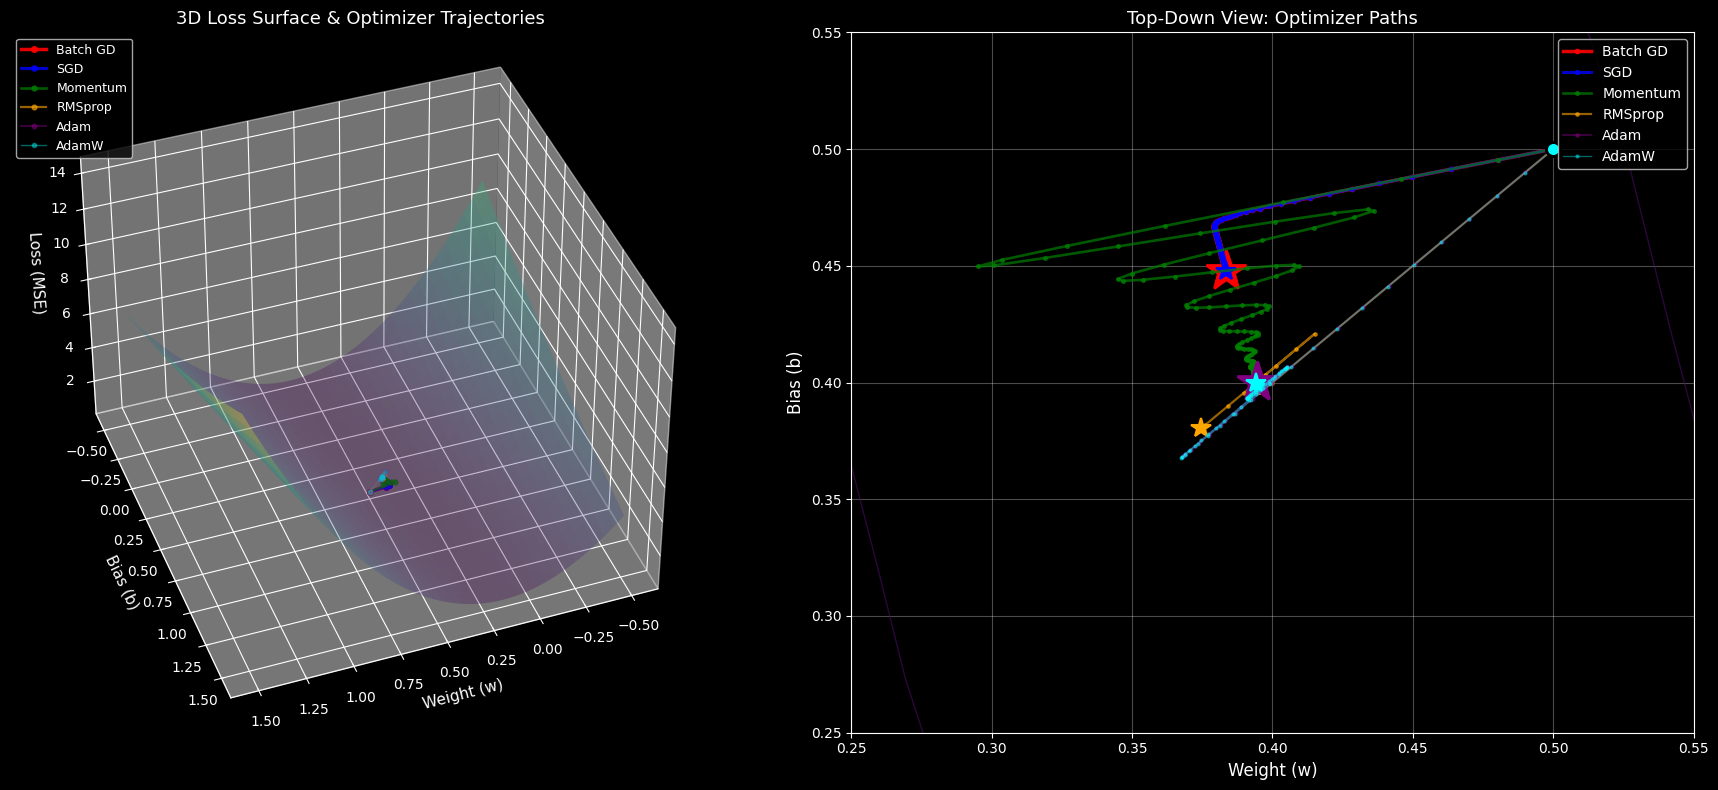

In [21]:
# 3D Visualization: Loss Surface with ALL Optimizer Paths
# You don't have to go through all the steps of the code because this is more about understanding the behaviour of each optimiser
# rather than coding .. because in practice we don't always visualise that .. imagine if we even just have 10 features!
print("Creating 3D loss surface visualization...")

fig = plt.figure(figsize=(18, 8))

# Subplot 1: 3D Loss surface with paths
ax1 = fig.add_subplot(121, projection='3d')

# Create grid for loss surface
w_range = np.linspace(-0.5, 1.5, 40)
b_range = np.linspace(-0.5, 1.5, 40)
W, B = np.meshgrid(w_range, b_range)

# Calculate loss for each point on the grid
Z = np.zeros_like(W)
X_flat = X_train.flatten()
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = W[i, j] * X_flat + B[i, j]
        Z[i, j] = 0.5 * np.mean((y_pred - y_train)**2)

# Plot surface
surf = ax1.plot_surface(W, B, Z, alpha=0.3, cmap='viridis', edgecolor='none')

# Plot optimizer paths
colors_3d = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
optimizer_names = ['Batch GD', 'SGD', 'Momentum', 'RMSprop', 'Adam', 'AdamW']

for i, (name, color) in enumerate(zip(optimizer_names, colors_3d)):
    if name in weight_histories and weight_histories[name][0] is not None:
        w_hist, b_hist = weight_histories[name]

        # Calculate loss values for the path
        z_hist = []
        for w, b in zip(w_hist, b_hist):
            y_pred = w * X_flat + b
            z = 0.5 * np.mean((y_pred - y_train)**2)
            z_hist.append(z)

        # Plot path
        step = max(1, len(w_hist) // 20) # showing that with 20 points across the path
        linewidth = 2.5 - 0.3 * i         # thinner for later optimizers
        markersize = 4 - 0.2 * i          # smaller markers for later ones
        alpha = 0.9 - 0.1 * i             # more transparent as i increases

        ax1.plot(w_hist[::step], b_hist[::step], z_hist[::step],
                 color=color, linewidth=linewidth, marker='o', markersize=markersize,
                 label=name, alpha=alpha)



ax1.set_xlabel('Weight (w)', fontsize=11)
ax1.set_ylabel('Bias (b)', fontsize=11)
ax1.set_zlabel('Loss (MSE)', fontsize=11)
ax1.set_title('3D Loss Surface & Optimizer Trajectories', fontsize=13)
ax1.legend(fontsize=9, loc='upper left')
ax1.view_init(elev=40, azim=70)

# Subplot 2: Top-down contour view
ax2 = fig.add_subplot(122)

# Create contour plot
contour = ax2.contour(W, B, Z, levels=30, cmap='viridis', alpha=0.6, linewidths=1)
ax2.clabel(contour, inline=True, fontsize=8, fmt='%.2f')


for i, (name, color) in enumerate(zip(optimizer_names, colors_3d)):
    if name in weight_histories and weight_histories[name][0] is not None:
        w_hist, b_hist = weight_histories[name]

        linewidth = 2.5 - 0.3 * i
        markersize = 3 - 0.2 * i
        alpha = 0.9 - 0.1 * i

        # Plot full path
        ax2.plot(w_hist, b_hist, color=color, linewidth=linewidth,
                 marker='o', markersize=markersize, label=name, alpha=alpha)

        # Mark start and end
        if name != 'Batch GD' and name != 'Adam':
            ax2.plot(w_hist[0], b_hist[0], 'ko', markersize=10,
                    markerfacecolor=color, markeredgewidth=2)

        if name == 'Batch GD' or name == 'Adam':
            ax2.plot(w_hist[-1], b_hist[-1], color=color, marker='*',
                    markersize=30, markerfacecolor=color, markeredgewidth=2)
        else:
            ax2.plot(w_hist[-1], b_hist[-1], color=color, marker='*',
                    markersize=15, markeredgecolor=color, markeredgewidth=1.5)





ax2.set_xlabel('Weight (w)', fontsize=12)
ax2.set_ylabel('Bias (b)', fontsize=12)
ax2.set_title('Top-Down View: Optimizer Paths', fontsize=13)
ax2.legend(fontsize=10, loc='upper right')
ax2.grid(True, alpha=0.3)
#ax2.set_xlim([w_range[0], w_range[-1]])
#ax2.set_ylim([b_range[0], b_range[-1]])

ax2.set_xlim([0.25, 0.55])
ax2.set_ylim([0.25, 0.55])


plt.tight_layout()
plt.show()


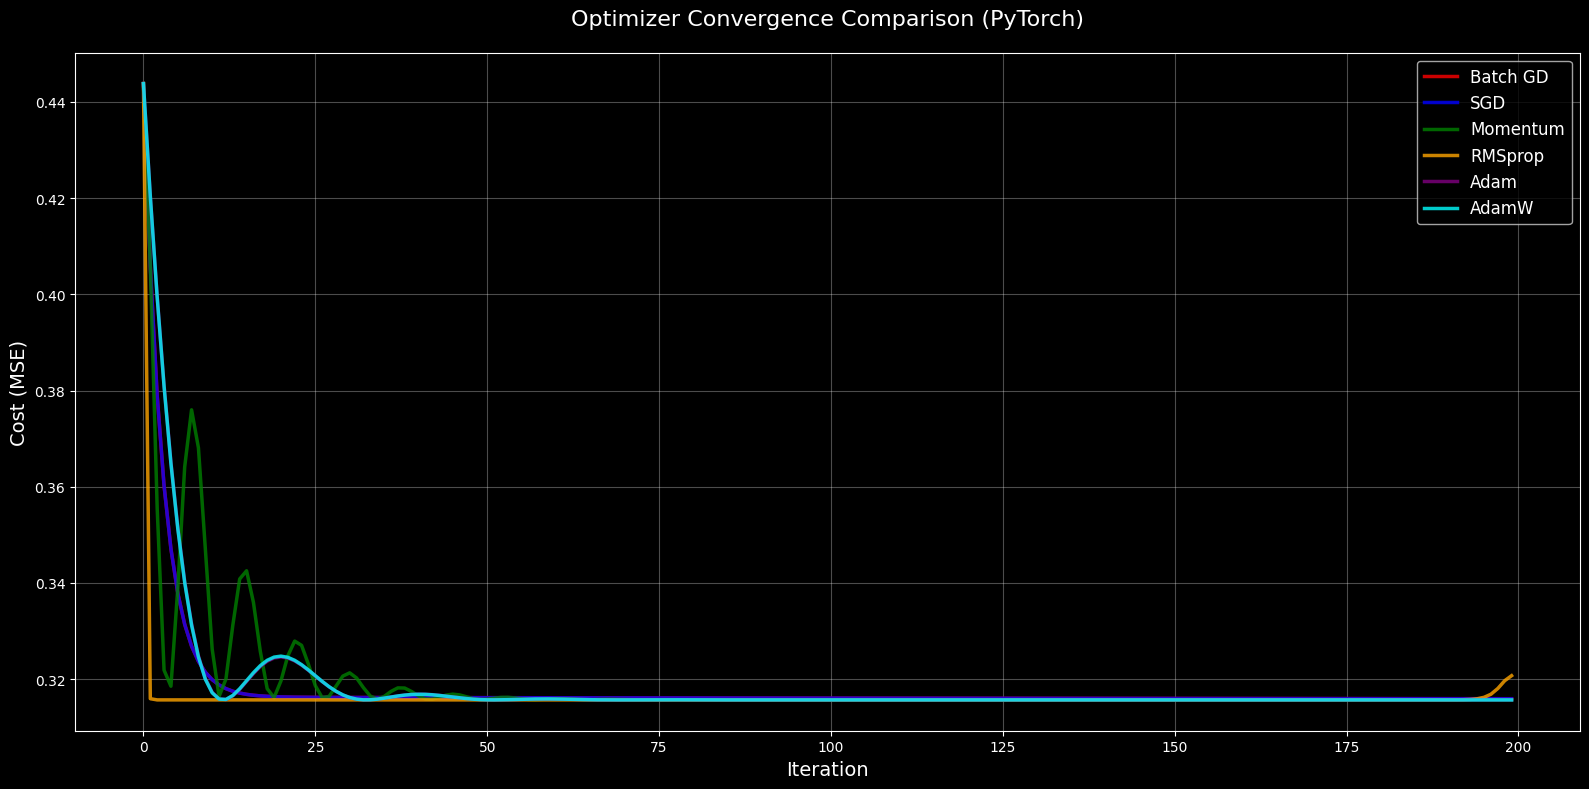

In [22]:
# Visualize optimizer comparison
plt.figure(figsize=(16, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
for (name, costs), color in zip(results.items(), colors):
    plt.plot(costs, linewidth=2.5, label=name, color=color, alpha=0.8)

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost (MSE)', fontsize=14)
plt.title('Optimizer Convergence Comparison (PyTorch)', fontsize=16, pad=20)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


These are ACTUAL PyTorch optimizers - the same ones used in production deep learning!


---

## Part 6: sklearn LinearRegression


Let's compare our from-scratch version with sklearn!

In [23]:
# Use sklearn's LinearRegression
from sklearn.linear_model import LinearRegression

# Train the model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Extract learned parameters
w_sklearn = sklearn_model.coef_[0]
b_sklearn = sklearn_model.intercept_

print("sklearn LinearRegression trained!")
print(f"\nLearned parameters:")
print(f"  Weight (w): {w_sklearn:.4f}")
print(f"  Bias (b):   {b_sklearn:.4f}")

sklearn LinearRegression trained!

Learned parameters:
  Weight (w): 0.3943
  Bias (b):   0.4001


In [24]:
# Compare with our from-scratch model (from Part 5)
print("\n" + "="*50)
print("COMPARISON: From-Scratch vs sklearn")
print("="*50)

# Our from-scratch model (Batch GD from Part 5)
# w_batch and b_batch are already scalars from cell 29
print(f"\nFrom-Scratch (Batch GD):")
print(f"  Final MSE:  {costs_batch[-1]}")

# sklearn model
y_pred_sklearn = sklearn_model.predict(X_train)
mse_sklearn = 0.5 * np.mean((y_pred_sklearn - y_train)**2)

print(f"\nsklearn LinearRegression:")
print(f"  Final MSE:  {mse_sklearn}")

print(f"\nDifference:")
print(f"  MSE difference:    {abs(costs_batch[-1] - mse_sklearn)}")

print("\nConclusion: Both methods produce nearly identical results!")
print("sklearn uses the Normal Equation (instant, no iteration needed).")


COMPARISON: From-Scratch vs sklearn

From-Scratch (Batch GD):
  Final MSE:  0.31592672361645446

sklearn LinearRegression:
  Final MSE:  0.3156783243855424

Difference:
  MSE difference:    0.0002483992309120775

Conclusion: Both methods produce nearly identical results!
sklearn uses the Normal Equation (instant, no iteration needed).


---

## Part 7: Practice Exercises

Now it's your turn! Apply what you learned to different features.

**These exercises are similar to the examples above** - just with different features. Use the code from Parts 3-6 as reference!

### Exercise 1: Linear Regression with a Different Feature

Build a linear regression model using **HouseAge** (feature index 1) instead of MedInc.

**Steps:**
1. Extract the HouseAge feature (X[:, 1])
2. Use gradient descent to train (same code as Part 3)
3. Visualize the fit
4. Calculate final MSE

In [25]:
# Extract HouseAge feature
x_houseage = X[:, 1]
y_price_ex1 = y

# YOUR CODE HERE: Initialize w, b, learning_rate, epochs
### BEGIN SOLUTION
np.random.seed(42)
w_ex1 = np.random.rand()
b_ex1 = np.random.rand()
learning_rate_ex1 = 0.001
epochs_ex1 = 500
cost_history_ex1 = []

# Training loop
for epoch in range(epochs_ex1):
    y_pred = (w_ex1 * x_houseage) + b_ex1
    error = y_pred - y_price_ex1

    grad_w = np.mean(error * x_houseage)
    grad_b = np.mean(error)

    w_ex1 -= learning_rate_ex1 * grad_w
    b_ex1 -= learning_rate_ex1 * grad_b

    cost = 0.5 * np.mean(error**2)
    cost_history_ex1.append(cost)

print(f"Final w: {w_ex1:.4f}")
print(f"Final b: {b_ex1:.4f}")
print(f"Final MSE: {cost_history_ex1[-1]:.4f}")
### END SOLUTION

Final w: 0.0326
Final b: 1.0068
Final MSE: 0.7082


In [26]:
# Tests
### BEGIN HIDDEN TESTS
assert 'w_ex1' in locals(), "Variable w_ex1 not found"
assert 'b_ex1' in locals(), "Variable b_ex1 not found"
assert 'cost_history_ex1' in locals(), "Variable cost_history_ex1 not found"
assert len(cost_history_ex1) > 0, "Cost history is empty"
assert cost_history_ex1[-1] < 1.5, "Final cost is too high - check your implementation"
print("✓ Exercise 1 tests passed!")
### END HIDDEN TESTS

✓ Exercise 1 tests passed!


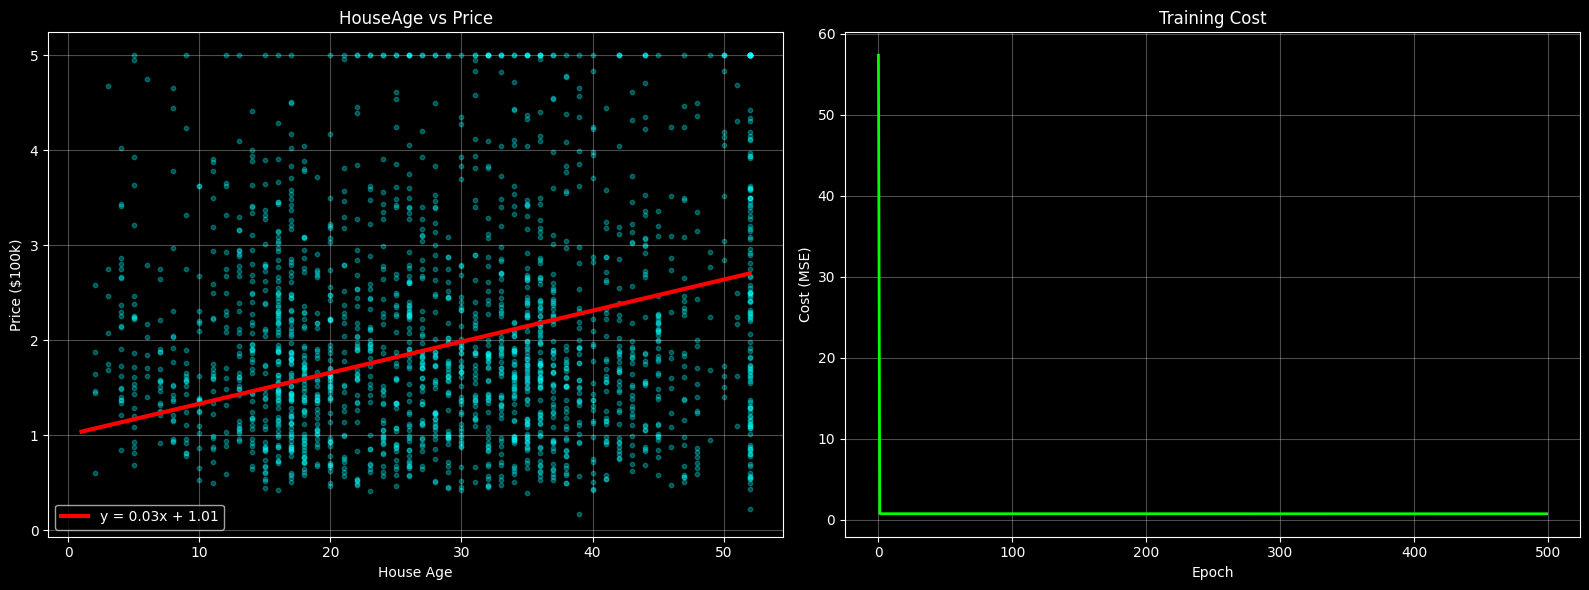


HouseAge has correlation 0.106 with price.
Compare this to MedInc's correlation of 0.688!


In [27]:
# Visualize your results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter + fitted line
indices = np.random.choice(len(x_houseage), 2000, replace=False)
axes[0].scatter(x_houseage[indices], y_price_ex1[indices], alpha=0.3, s=10, c='cyan')
x_line = np.linspace(x_houseage.min(), x_houseage.max(), 100)
y_line = w_ex1 * x_line + b_ex1
axes[0].plot(x_line, y_line, 'r-', linewidth=3, label=f'y = {w_ex1:.2f}x + {b_ex1:.2f}')
axes[0].set_xlabel('House Age')
axes[0].set_ylabel('Price ($100k)')
axes[0].set_title('HouseAge vs Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Cost curve
axes[1].plot(cost_history_ex1, 'lime', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Cost (MSE)')
axes[1].set_title('Training Cost')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nHouseAge has correlation {np.corrcoef(x_houseage, y_price_ex1)[0,1]:.3f} with price.")
print(f"Compare this to MedInc's correlation of {np.corrcoef(X[:, 0], y)[0,1]:.3f}!")

### Exercise 2: Compare Two Features

Train linear regression on **AveRooms** (feature 2) and compare its performance (MSE) to **MedInc** (feature 0).

Which feature gives better predictions?

In [28]:
# YOUR CODE HERE: Train on AveRooms (feature 2)
### BEGIN SOLUTION
x_averrooms = X[:, 2]

# Train model
np.random.seed(42)
w_ex2 = np.random.rand()
b_ex2 = np.random.rand()
learning_rate_ex2 = 0.01
epochs_ex2 = 500
cost_history_ex2 = []

for epoch in range(epochs_ex2):
    y_pred = (w_ex2 * x_averrooms) + b_ex2
    error = y_pred - y

    grad_w = np.mean(error * x_averrooms)
    grad_b = np.mean(error)

    w_ex2 -= learning_rate_ex2 * grad_w
    b_ex2 -= learning_rate_ex2 * grad_b

    cost = 0.5 * np.mean(error**2)
    cost_history_ex2.append(cost)

final_mse_averrooms = cost_history_ex2[-1]
final_mse_medinc = cost_history[-1]  # From Part 3

print(f"AveRooms - Final MSE: {final_mse_averrooms:.4f}")
print(f"MedInc   - Final MSE: {final_mse_medinc:.4f}")
print(f"\nBetter feature: {'MedInc' if final_mse_medinc < final_mse_averrooms else 'AveRooms'}")
### END SOLUTION

AveRooms - Final MSE: 0.6597
MedInc   - Final MSE: 0.3511

Better feature: MedInc


In [29]:
# Tests
### BEGIN HIDDEN TESTS
assert 'final_mse_averrooms' in locals(), "Variable final_mse_averrooms not found"
assert 'final_mse_medinc' in locals(), "Variable final_mse_medinc not found"
assert final_mse_medinc < final_mse_averrooms, "MedInc should have lower MSE"
print("✓ Exercise 2 tests passed!")
print(f"\nInsight: MedInc is {((final_mse_averrooms/final_mse_medinc - 1)*100):.1f}% better than AveRooms!")
### END HIDDEN TESTS

✓ Exercise 2 tests passed!

Insight: MedInc is 87.9% better than AveRooms!


### Exercise 3: Polynomial Regression Practice

Train a **degree 2** polynomial regression on **MedInc** and compare it to the linear model (degree 1).

Does the polynomial give better results?

In [30]:
# YOUR CODE HERE: Use sklearn polynomial functions from Part 4
### BEGIN SOLUTION
# Train degree 2 polynomial using sklearn
weights_poly2, costs_poly2, _ = train_polynomial_regression_sklearn(
    x_medinc, y_price, degree=2, epochs=500
)

# Compare with linear (degree 1) using sklearn
weights_poly1, costs_poly1, _ = train_polynomial_regression_sklearn(
    x_medinc, y_price, degree=1, epochs=500
)

final_mse_poly1 = costs_poly1[-1]
final_mse_poly2 = costs_poly2[-1]

print(f"Degree 1 (Linear) - Final MSE: {final_mse_poly1:.4f}")
print(f"Degree 2 (Quadratic) - Final MSE: {final_mse_poly2:.4f}")
print(f"\nImprovement: {((final_mse_poly1 - final_mse_poly2)/final_mse_poly1 * 100):.2f}%")
### END SOLUTION

Degree 1 (Linear) - Final MSE: 0.3506
Degree 2 (Quadratic) - Final MSE: 0.3475

Improvement: 0.87%


In [31]:
# Tests
### BEGIN HIDDEN TESTS
assert 'final_mse_poly1' in locals(), "Variable final_mse_poly1 not found"
assert 'final_mse_poly2' in locals(), "Variable final_mse_poly2 not found"
assert final_mse_poly2 < final_mse_poly1, "Degree 2 should have lower MSE"
assert len(weights_poly2) == 3, "Degree 2 should have 3 weights [b, w1, w2]"
print("✓ Exercise 3 tests passed!")
print(f"\nThe quadratic term improved the model by capturing non-linear patterns!")
### END HIDDEN TESTS

✓ Exercise 3 tests passed!

The quadratic term improved the model by capturing non-linear patterns!


---

## Summary & Next Steps

**Congratulations!** You've completed Week 3!

<div dir="rtl" style="text-align: right; font-size: 0.9em; color: #888; margin: 10px 0;">مبروك! خلصت  Week 3 بنجاح والحمد لله 🎉</div>

### What You Accomplished Today:

1. ✅ Loaded and explored a **real dataset** with 20,000+ actual houses (not synthetic data!)
2. ✅ Analyzed **correlation** between features and target
3. ✅ Built **linear regression from scratch** using gradient descent
4. ✅ Implemented **polynomial regression** and saw overfitting
5. ✅ Compared **6 different optimizers** (Batch GD, SGD, Mini-batch, Momentum, RMSprop, Adam)
6. ✅ Visualized **3D loss surfaces** and weight update paths
7. ✅ Used **Pytorch**
7. ✅ Used **sklearn**
8. ✅ Practiced with different features

### How This Connects to Previous Weeks:

**Week 1 Skills Used (Lectures 1-2):**
- Loops for gradient descent iterations
- Functions for creating predictions and calculating cost
- Lists for storing cost history

**Week 2 Skills Used (Lectures 1-2 continued):**
- NumPy arrays for efficient computations
- Vectorization for fast gradient calculations
- Broadcasting for weight updates
- Matplotlib for all visualizations
- Statistical operations (mean, std, correlation)

### What's Next?

**Week 4 (Lectures 5-6):**
- **Lecture 5:** Perceptron, Adaline & Multiclass Classification
- **Lecture 6:** Logistic Regression & Neural Networks
- Transition from regression to classification problems
- Backpropagation


### Key Takeaways:

1. **Real data matters** - Today you worked with 20,640 actual California houses!
2. **Correlation is key** - MedInc has the strongest correlation (+0.688) with price
3. **Gradient descent works** - Cost decreased smoothly
4. **Polynomial regression** can fit curves but watch for overfitting!
5. **Optimizers differ** - Adam gives nice results


### Questions?

If you have any questions about this week's material, feel free to reach out:

**Dr. Mahmoud Eid**  
Email: m.eid@fci-cu.edu.eg

---

**Keep learning, keep building!** 🚀

See you in Week 4!